<a href="https://colab.research.google.com/github/afrojaakter/Popular-ML-Algorithms/blob/main/DecisionTreeFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Decision Tree Classification Algorithm
- Decision Tree is a non-parametric supervised learning algorithm mostly used for classification problem but it can be used for regression problems  as well.
- It is a tree structured classifier, where internal nodes (decision node) represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. 
- Because of its similarity to a tree, it is called decision tree where, it starts with the root node, which expands on further branches and constructs a tree-like structure.
- We use **CART (Classification and Regression Tree)** algorithm in order to build a tree.
- A decision tree simply asks a yes/no question and based on that it further splits the tree into subtrees. 


#### Decision Tree Terminologies
- Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
- Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
- Branch/Sub Tree: A tree formed by splitting the tree.
- Pruning: Pruning is the process of removing the unwanted branches from the tree.
- Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

####How does the Decision Tree algorithm Work?
- Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
-nStep-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
-nStep-3: Divide the S into subsets that contains possible values for the best attributes.
-nStep-4: Generate the decision tree node, which contains the best attribute.
-nStep-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

**Example:** Suppose there is a candidate who has a job offer and wants to decide whether he should accept the offer or Not. So, to solve this problem, the decision tree starts with the root node (Salary attribute by ASM). The root node splits further into the next decision node (distance from the office) and one leaf node based on the corresponding labels. The next decision node further gets split into one decision node (Cab facility) and one leaf node. Finally, the decision node splits into two leaf nodes (Accepted offers and Declined offer). Consider the below diagram:

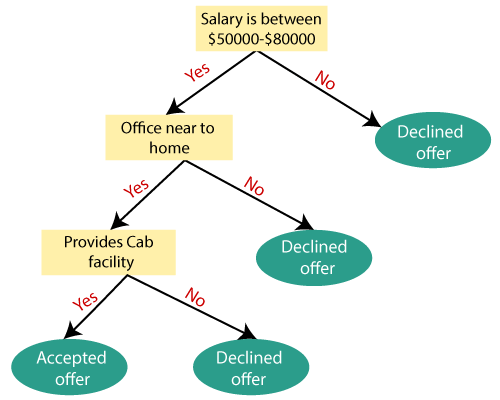

####Attribute Selection Measures

While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

- Information Gain
- Gini Index

**Information Gain:**

- Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
- It calculates how much information a feature provides us about a class.
- According to the value of information gain, we split the node and build the decision tree.
- A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

Information Gain = Entropy(S) - Weighted Avg*Entropy(each feature)

**Entropy:**
$Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)$

Where,
- S= Total number of samples
- P(yes)= probability of yes
- P(no)= probability of no



**Gini Index:**

Suppose we have two classes in the dataset:

$$k_{1}, k_{2}$$

Each of the classes have $n_{1}$ and $n_{2}$ observations.

The probability of observing something from one of the $k$ classes is:

$$p(i) = P(x_{i} \in k_{i}) = \dfrac{n_{i}}{n_{1} + n_{2}},  i \in \{1, 2\}$$
The GINI impurity of such a system is calculated with the following formula:

$$G = 1 - \Sigma_{i=1}^{2}p(i)^{2}$$


- Gini index is a measure of impurity used while creating a CART algorithm
- An attribute with low Gini index should be preferred.
- Gini index only creates a binary splits to the dataset.


Some advantages of decision trees are:

- Simple to understand and easy to interpret. Trees can be visualised.

- Requires little data preparation. Note however that this module does not support missing values.

- Able to handle both numerical and categorical data. 

- Able to handle multi-output problems.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [ ]:
import pandas as pd
import numpy as np

#Quick value counter
from collections import Counter

class Node:
  '''Each node has the following main attributes:
      Gini impurity score
      Number of observations
      The number of observations belonging to each of the binary target classes.
      The feature matrix X representing the observations that fall into the node.
'''
  def __init__(self, Y: list, X: pd.DataFrame, min_sample_split=None,
               max_depth=None, depth=None, node_type=None,rule=None):
    #Saving the data to the node
    self.Y = Y
    self.X = X

    #Saving the hyper-parameters
    self.min_sample_split = min_sample_split if min_sample_split else 20
    self.max_depth = max_depth if max_depth else 5

    # Default current depnth of the node
    self.depth = depth if depth else 0

    #Extracting all features
    self.features = list(self.X.columns)

    #Type of node
    self.node_type = node_type if node_type else 'root'

    # Rule for spliting
    self.rule = rule if rule else ""
    # Calculating the counts of Y in the node
    self.counts = Counter(Y)

    # Getting the GINI inpurity based on the Y distribution
    self.gini_impurith = self.get_GINI()

    # Sorting the counts and saving the final prediction of the node
    counts_sorted = list(sorted(self.counts.items(), keys=lambda item: item[1]))
